In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook   # pip install tqdm
from libs import stock_daum, stock_naver

## 코스피 종목코드 수집

In [16]:
# 코스피 지수 CSV를 읽어들입니다.
kospi_df = pd.read_csv("https://bit.ly/3g5YKXT", index_col='종목명', dtype={'종목코드': str})
print(kospi_df.shape)
kospi_df.head()

(768, 1)


,종목코드
종목명,
미원에스씨,268280
경동도시가스,267290
넷마블게임즈,251270
아이엔지생명,079440
현대건설기계,267270


In [17]:
kospi_series = kospi_df['종목코드']
kospi_series.head()

종목명
미원에스씨     268280
경동도시가스    267290
넷마블게임즈    251270
아이엔지생명    079440
현대건설기계    267270
Name: 종목코드, dtype: object

## 종목별 실시간 시세 시각화

In [18]:
code = kospi_series['삼성전자']
삼성전자_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

code = kospi_series['LG전자']
LG전자_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

code = kospi_series['SK하이닉스']
SK하이닉스_volume_df = stock_naver.get_종목별_시간별_시세(code, max_page=20)

In [19]:
print(삼성전자_volume_df.shape)
삼성전자_volume_df.head()

(200, 6)


,체결가,전일비,매도,매수,거래량,변동량
체결시각,,,,,,
2021-10-06 15:58:00,71300.0,900.0,71300.0,71200.0,18808362.0,366.0
2021-10-06 15:57:00,71300.0,900.0,71300.0,71200.0,18807996.0,726.0
2021-10-06 15:56:00,71300.0,900.0,71300.0,71200.0,18807270.0,1667.0
2021-10-06 15:55:00,71300.0,900.0,71300.0,71200.0,18805603.0,652.0
2021-10-06 15:54:00,71300.0,900.0,71300.0,71200.0,18804951.0,3525.0


<AxesSubplot:xlabel='체결시각'>

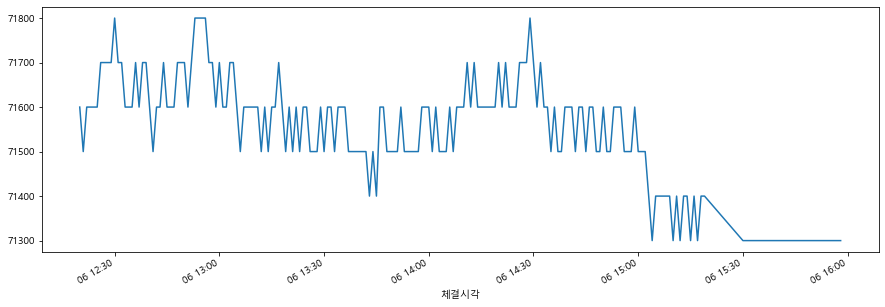

In [20]:
삼성전자_volume_df['체결가'].plot(figsize=(15, 5))

<AxesSubplot:xlabel='체결시각'>

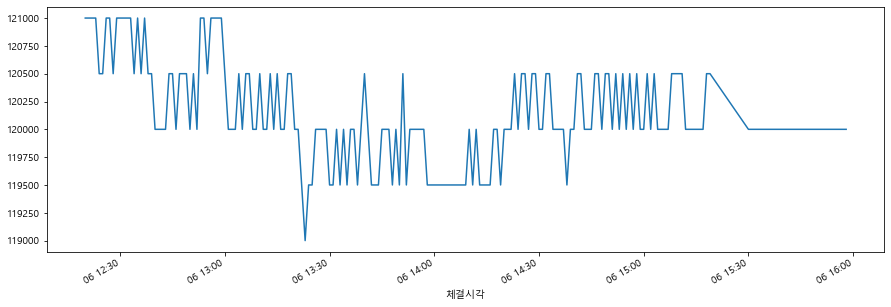

In [21]:
LG전자_volume_df['체결가'].plot(figsize=(15, 5))

<AxesSubplot:xlabel='체결시각'>

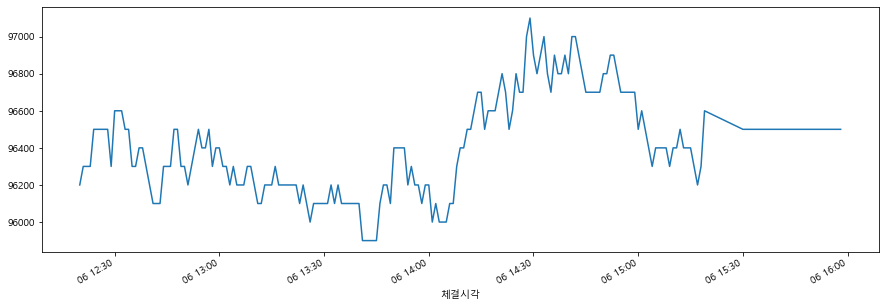

In [22]:
SK하이닉스_volume_df['체결가'].plot(figsize=(15, 5))

## 하나의 DataFrame으로 처리

In [23]:
df = pd.DataFrame({
    '삼성전자': 삼성전자_volume_df['체결가'],
    'LG전자': LG전자_volume_df['체결가'],
    'SK하이닉스': SK하이닉스_volume_df['체결가'],
})

start_ts = df.iloc[0].name
end_ts = df.iloc[-1].name

print(start_ts, '~', end_ts)

print(df.shape)
df.head()

2021-10-06 15:58:00 ~ 2021-10-06 12:20:00
(200, 3)


,삼성전자,LG전자,SK하이닉스
체결시각,,,
2021-10-06 15:58:00,71300.0,120000.0,96500.0
2021-10-06 15:57:00,71300.0,120000.0,96500.0
2021-10-06 15:56:00,71300.0,120000.0,96500.0
2021-10-06 15:55:00,71300.0,120000.0,96500.0
2021-10-06 15:54:00,71300.0,120000.0,96500.0


## 체결가 시각화

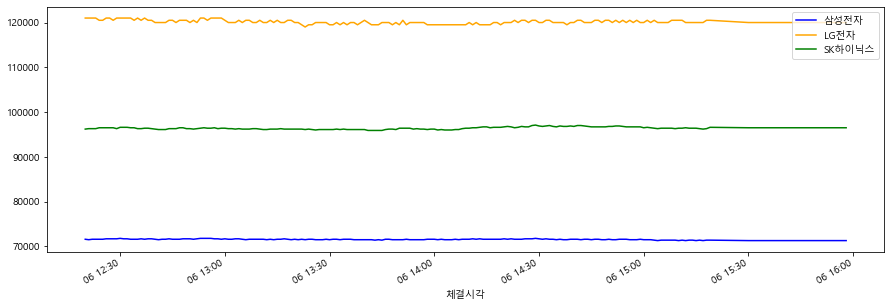

In [24]:
ax = df.plot(figsize=(15, 5), color=['blue', 'orange', 'green'])

In [25]:
df2 = pd.DataFrame({
#     '삼성전자': 삼성전자_volume_df['체결가'],
    'LG전자': LG전자_volume_df['체결가'],
    'SK하이닉스': SK하이닉스_volume_df['체결가'],
})
print(df2.shape)
df2.head()

(200, 2)


,LG전자,SK하이닉스
체결시각,,
2021-10-06 15:58:00,120000.0,96500.0
2021-10-06 15:57:00,120000.0,96500.0
2021-10-06 15:56:00,120000.0,96500.0
2021-10-06 15:55:00,120000.0,96500.0
2021-10-06 15:54:00,120000.0,96500.0


<AxesSubplot:xlabel='체결시각'>

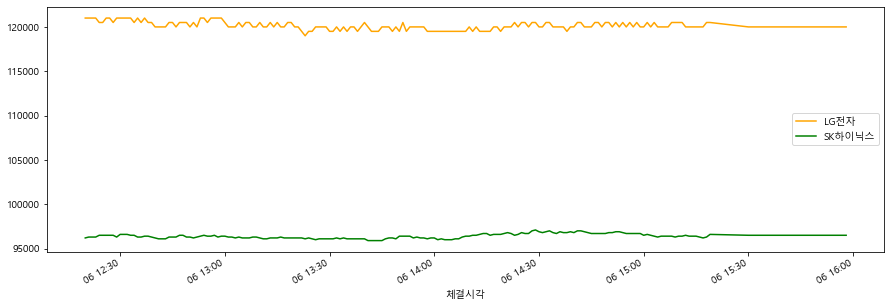

In [26]:
df2.plot(figsize=(15, 5), color=['orange', 'green'])

In [27]:
import xlwings as xw

In [28]:
name = '코스피 3개 종목별 실시간 시세'

sheet = xw.sheets.active
sheet.range('N14').value = name
sheet.range('N15').value = df.iloc[::-1][:-10]
sheet.range('N15').expand().columns.autofit()

<Picture '코스피 3개 종목별 실시간 시세' in <Sheet [통합 문서1]Sheet1>>

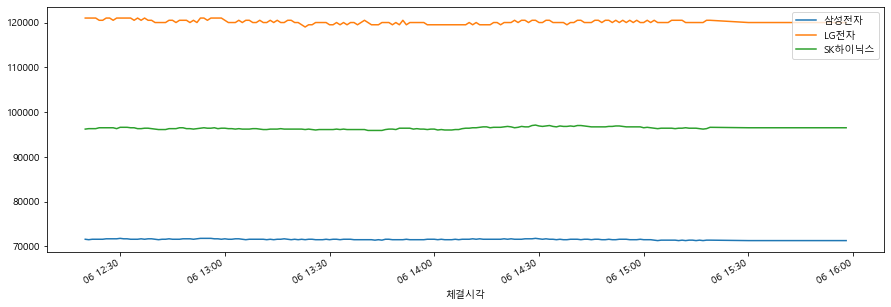

In [29]:
ax = df.plot(figsize=(15,5))

left = sheet.range('R15').left
top = sheet.range('R15').top

sheet.pictures.add(ax.figure, name=name, update=True, left=left, top=top)